In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv('diamonds.zip')

In [196]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [69]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [197]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [8]:
cat_list = ['cut','color', 'clarity']

In [15]:
for cat in cat_list:
    print(f"column {cat}, value counts:\n{df[cat].value_counts()}\n")

column cut, value counts:
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

column color, value counts:
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

column clarity, value counts:
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64



In [ ]:
df.describe()

In [93]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [16]:
df.corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000

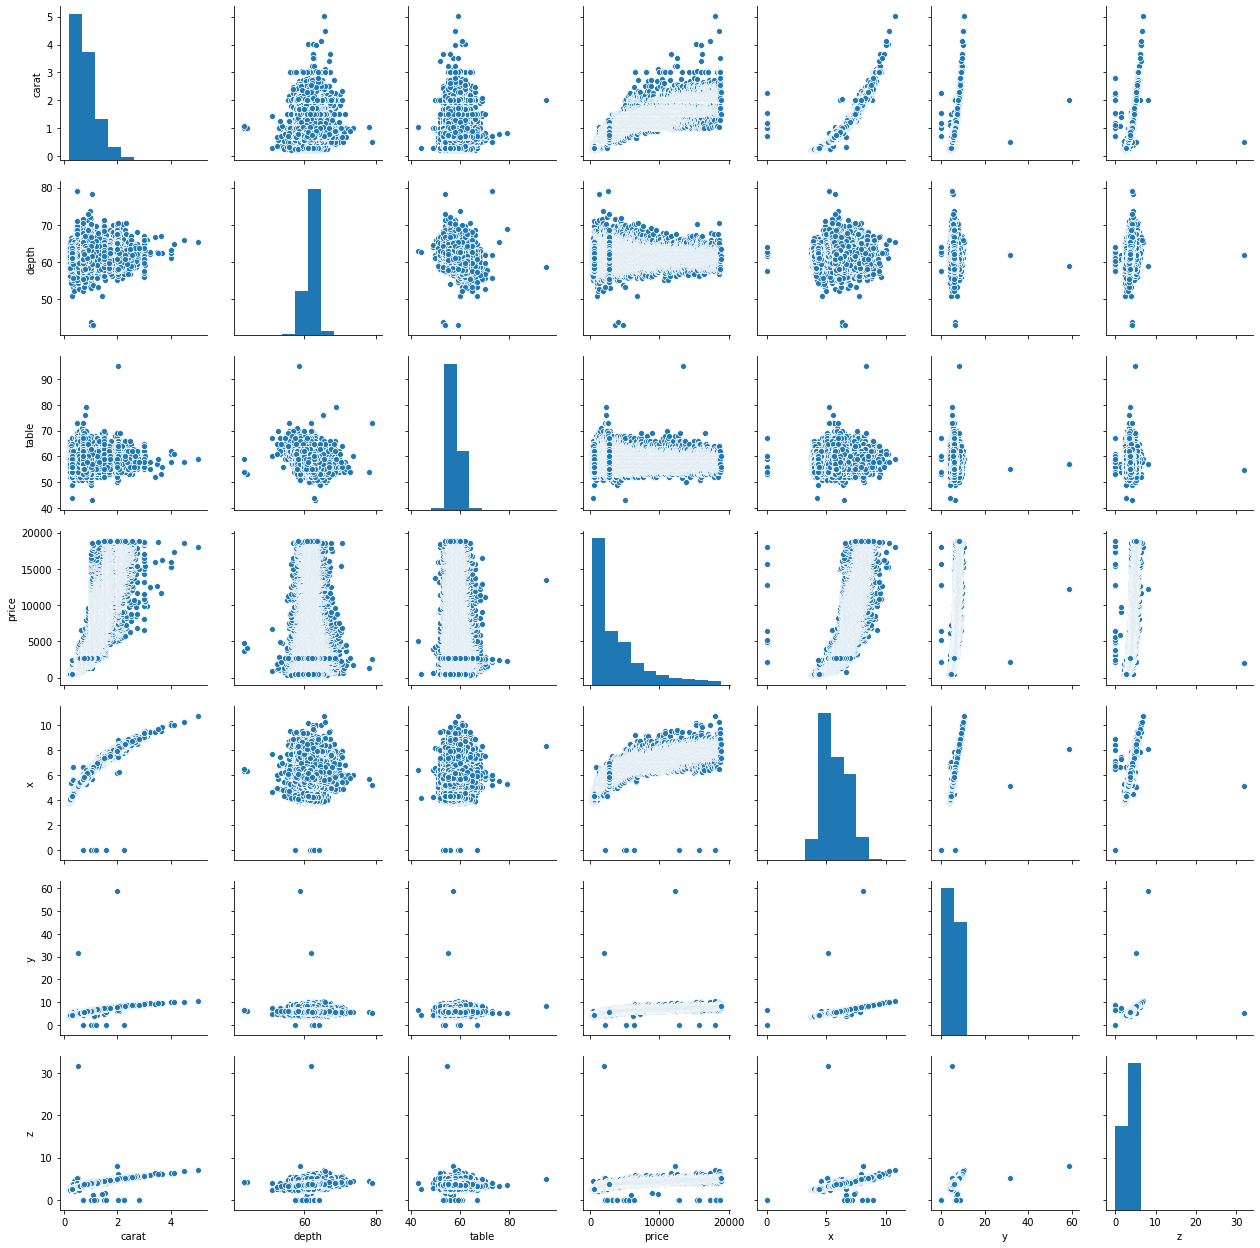

In [17]:
sns.pairplot(df)

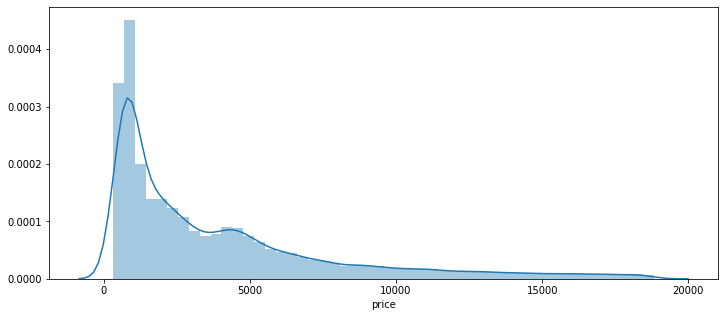

In [154]:
plt.figure(figsize=(12,5))
sns.distplot(df['price'],bins=50)

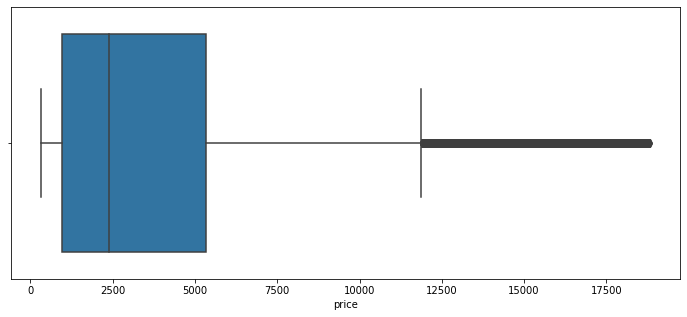

In [138]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x=df['price'])

In [156]:
len(df[df['price']>12000])/len(df)*100

6.420096403411198

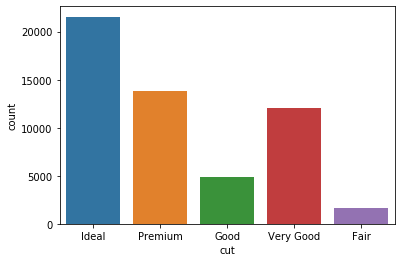

In [18]:
sns.countplot(data=df,x='cut')

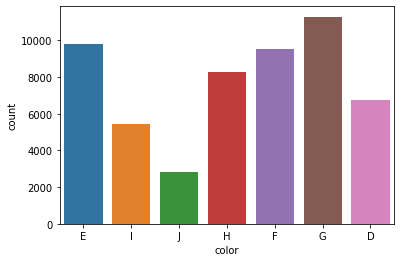

In [19]:
sns.countplot(data=df,x='color')

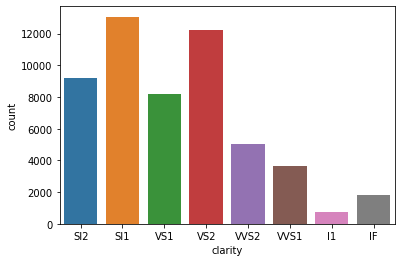

In [20]:
sns.countplot(data=df,x='clarity')

In [198]:
cut_dict = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair':1}

In [199]:
df['cut'] = df['cut'].map(cut_dict)

In [200]:
df['cut']

0        5
1        4
2        2
3        4
4        2
        ..
53935    5
53936    2
53937    3
53938    4
53939    5
Name: cut, Length: 53940, dtype: int64

In [201]:
from sklearn.preprocessing import LabelEncoder

In [202]:
le_color = LabelEncoder()
df['color'] = le_color.fit_transform(df['color'])

In [203]:
le_clarity = LabelEncoder()
df['clarity'] = le_clarity.fit_transform(df['clarity'])

In [204]:
df.head()

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    5      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    4      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    4      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      6        3   63.3   58.0    335  4.34  4.35  2.75

In [205]:
df_getdummies = pd.get_dummies(df[['color','clarity']],columns=['color','clarity'],drop_first=True)

In [206]:
df_getdummies.head()

color_1  color_2  color_3  color_4  color_5  color_6  clarity_1  clarity_2  \
0        1        0        0        0        0        0          0          0   
1        1        0        0        0        0        0          0          1   
2        1        0        0        0        0        0          0          0   
3        0        0        0        0        1        0          0          0   
4        0        0        0        0        0        1          0          0   

   clarity_3  clarity_4  clarity_5  clarity_6  clarity_7  
0          1          0          0          0          0  
1          0          0          0          0          0  
2          0          1          0          0          0  
3          0          0          1          0          0  
4          1          0          0          0          0

In [207]:
df = pd.concat([df,df_getdummies],axis=1)

In [208]:
df.head()

carat  cut  color  clarity  depth  table  price     x     y     z  ...  \
0   0.23    5      1        3   61.5   55.0    326  3.95  3.98  2.43  ...   
1   0.21    4      1        2   59.8   61.0    326  3.89  3.84  2.31  ...   
2   0.23    2      1        4   56.9   65.0    327  4.05  4.07  2.31  ...   
3   0.29    4      5        5   62.4   58.0    334  4.20  4.23  2.63  ...   
4   0.31    2      6        3   63.3   58.0    335  4.34  4.35  2.75  ...   

   color_4  color_5  color_6  clarity_1  clarity_2  clarity_3  clarity_4  \
0        0        0        0          0          0          1          0   
1        0        0        0          0          1          0          0   
2        0        0        0          0          0          0          1   
3        0        1        0          0          0          0          0   
4        0        0        1          0          0          1          0   

   clarity_5  clarity_6  clarity_7  
0          0          0          0  
1          0          0          0  
2          0          0          0  
3          1          0          0  
4          0          0          0  

[5 rows x 23 columns]

In [178]:
# df.drop(['color','clarity'],axis=1,inplace=True)

In [209]:
df.corr()['price']

carat        0.921591
cut         -0.053491
color        0.172511
clarity     -0.071535
depth       -0.010647
table        0.127134
price        1.000000
x            0.884435
y            0.865421
z            0.861249
color_1     -0.101089
color_2     -0.024161
color_3      0.008556
color_4      0.059223
color_5      0.097125
color_6      0.081710
clarity_1   -0.049596
clarity_2    0.008957
clarity_3    0.128420
clarity_4   -0.009886
clarity_5   -0.001062
clarity_6   -0.095266
clarity_7   -0.052381
Name: price, dtype: float64

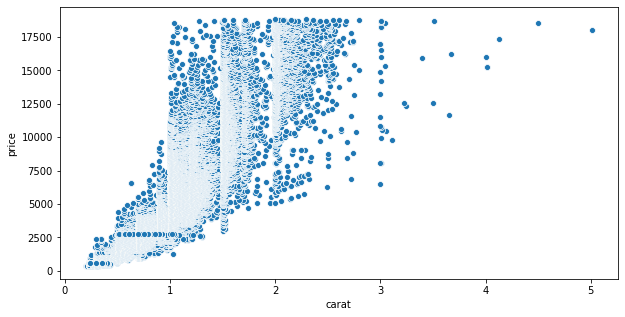

In [180]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='carat',y='price',data=df)

In [210]:
X = df.drop('price',axis=1)
y = df['price']

In [83]:
from sklearn.model_selection import train_test_split

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [212]:
X_train_copy = X_train.copy()

In [213]:
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

In [185]:
from sklearn.preprocessing import StandardScaler

In [214]:
ss = StandardScaler()

In [215]:
X_train_copy = ss.fit_transform(X_train_copy)
X_test_copy = ss.transform(X_test_copy)

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [189]:
from sklearn import metrics

In [216]:
def machine_learning_score(regressor,X_train,y_train,X_test,y_test):
    regressor.fit(X_train,y_train)
    predictions = regressor.predict(X_test)
    print(f"Mean absolute error: {metrics.mean_absolute_error(y_test,predictions)}")
    print(f"Mean squared error: {metrics.mean_squared_error(y_test,predictions)}")
    print(f"Root Mean squared error: {np.sqrt(metrics.mean_squared_error(y_test,predictions))}")
    print(f"The explained variance score: {metrics.explained_variance_score(y_test,predictions)}")
#     sns.scatterplot(x=y_test,y=predictions)
    sns.distplot((y_test-predictions),bins=50)

Mean absolute error: 734.9073099022426
Mean squared error: 1250591.2735204743
Root Mean squared error: 1118.2983830447374
The explained variance score: 0.9198150281623974


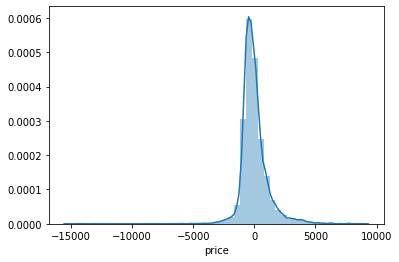

In [217]:
# linear regression

lr = LinearRegression()
machine_learning_score(lr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

Mean absolute error: 1694.5622220699267
Mean squared error: 10374789.902438063
Root Mean squared error: 3220.9920680495416
The explained variance score: 0.4312315473221271


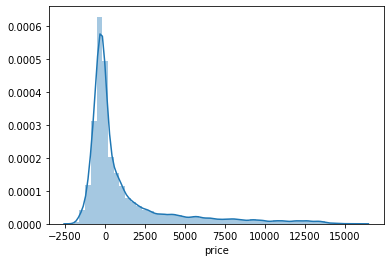

In [125]:
# Support Vector Machine

svr = SVR()
machine_learning_score(svr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

Mean absolute error: 390.08216536892843
Mean squared error: 529709.8127648005
Root Mean squared error: 727.8116602286615
The explained variance score: 0.9660683790988419


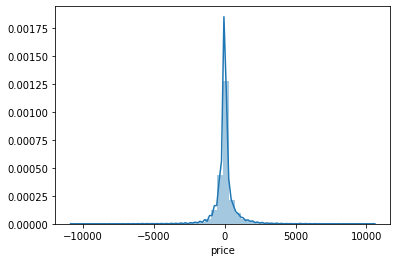

In [218]:
# k nearest neighbor
knr = KNeighborsRegressor()
machine_learning_score(knr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

Mean absolute error: 362.4426523297491
Mean squared error: 545390.6039735508
Root Mean squared error: 738.5056560200137
The explained variance score: 0.9650312083683589


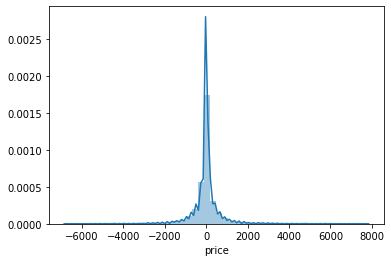

In [219]:
# decision tree
dtree = DecisionTreeRegressor()
machine_learning_score(dtree,X_train_copy,y_train_copy,X_test_copy,y_test_copy)

C:\Users\shaya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean absolute error: 282.21154636839293
Mean squared error: 315168.33246946847
Root Mean squared error: 561.3985504696894
The explained variance score: 0.9797961236101144


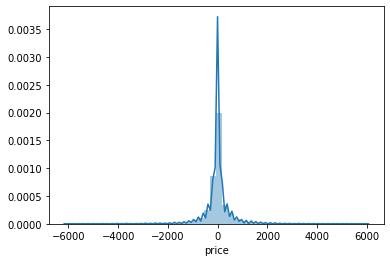

In [220]:
# random forest regressor
rfr = RandomForestRegressor()
machine_learning_score(rfr,X_train_copy,y_train_copy,X_test_copy,y_test_copy)